### Exploring the Images

In [ ]:
import glob 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline

images = []

for file in glob.glob("Dataset_BUSI_with_GT/images_folder/*"):
    im = mpimg.imread(file)   
    images.append(im)
plt.imshow(images[0])



### Preprocess the Data

(100, 100, 3)


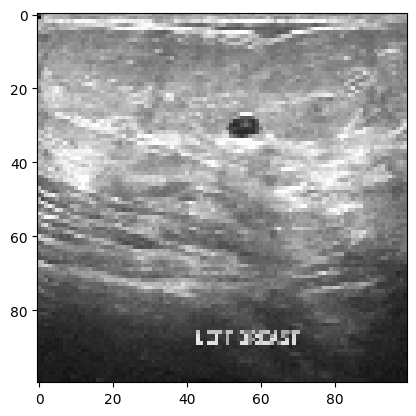

In [2]:
!pip install opencv-python
import cv2
import numpy as np

def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    standard_im = cv2.resize(image_crop, (100,100))
    return standard_im

std_img = standardize_input(benign[0])
print(std_img.shape)
plt.imshow(std_img)

### Create the CNN Model
After exploring the images, I chose to standardize the images to (100,100). 

In [7]:
import numpy as np

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_file
from tensorflow.keras import layers, models
import os
from sklearn.model_selection import train_test_split


data_dir = 'C:/Users/ghimi/OneDrive/Documents/Computer Science/ML/Dataset_BUSI_with_GT/images_folder'  
batch_size = 32

target_size = (100,100)


# I'm using the ImageDataGenerator class from tensorflow to standardize the images while also prepping for the train/test split
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.3 # train/test split
)


# Splitting the dataset into training and validation sets using datagen.flow_from_directory
print("Training Set: ")
print("-------------------------------------")

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size= target_size,
    batch_size=batch_size,
    class_mode='categorical', # the flow_from_directory method handles the class labels
    subset='training',
    shuffle=True  # shuffles the list
)

print("")
print("Validation Set: ")
print("-------------------------------------")

valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Further split validation to get test set
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir, 
    target_size = target_size, 
    batch_size = batch_size, 
    class_mode = 'categorical', 
    shuffle=True
)

Training Set: 
-------------------------------------
Found 1106 images belonging to 3 classes.

Validation Set: 
-------------------------------------
Found 472 images belonging to 3 classes.
Found 1578 images belonging to 3 classes.


In [2]:
# Creating the model
model = models.Sequential()

model.add(layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(layers.MaxPooling2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool_2'))

model.add(layers.Conv2D(
    filters=128, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_3', activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool_3'))

model.add(layers.Conv2D(
    filters=256, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_4', activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool_4'))


model.add(layers.Flatten())
model.add(layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))


model.add(layers.Dropout(rate=0.5))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(
    units=3, name='fc_2', 
    activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, 
                    validation_data=valid_generator, 
                    shuffle=True)

Epoch 1/20


C:\Users\ghimi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.4689 - loss: 1.0106 - val_accuracy: 0.5678 - val_loss: 0.8298
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 980ms/step - accuracy: 0.5542 - loss: 0.8517 - val_accuracy: 0.5932 - val_loss: 0.7768
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 984ms/step - accuracy: 0.6708 - loss: 0.7386 - val_accuracy: 0.6970 - val_loss: 0.7565
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 926ms/step - accuracy: 0.6815 - loss: 0.7300 - val_accuracy: 0.6886 - val_loss: 0.8702
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 953ms/step - accuracy: 0.7129 - loss: 0.7024 - val_accuracy: 0.7712 - val_loss: 0.5944
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7683 - loss: 0.6122 - val_accuracy: 0.6970 - val_loss: 0.6989
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 958ms/step - accuracy: 0.7866 - loss: 0.5091 - val_accuracy: 0.7373 - val_loss: 0.5693
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 955ms/step - accuracy: 0.8315 - loss: 0.4097 - val_accuracy: 0.7754 - va

### Evaluate accuracy

In [3]:
test_results = model.evaluate(train_generator)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.9791 - loss: 0.0574

Test Acc. 98.10%


My CNN model consists of 4 convolution layers, 4 max pooling layers, 1 fully connected layer with 1024 units, 3 dropout layers and an output layer with 3 units, each for one class. The convolution layers use the relu activation function with a kernel size of (5,5). I chose to add three dropout layers to mitigate the overfitting I faced with my inital models. 

My model compiles using the Adam optimizer and the categorical cross-entropy loss function. After running 20 epochs, the model reached an accuracy score of 96.36%.

### Predict

In [11]:
predictions = model.predict(valid_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = valid_generator.classes

# Display some results
# for i in range(20):
#     print(f"Image {i + 1}: Predicted = {predicted_labels[i]}, True = {true_labels[i]}")

acc = np.mean(predicted_labels==true_labels)
print("Accuracy: " ,acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step
Accuracy:  0.4258474576271186


### Epoch vs. Accuracy 

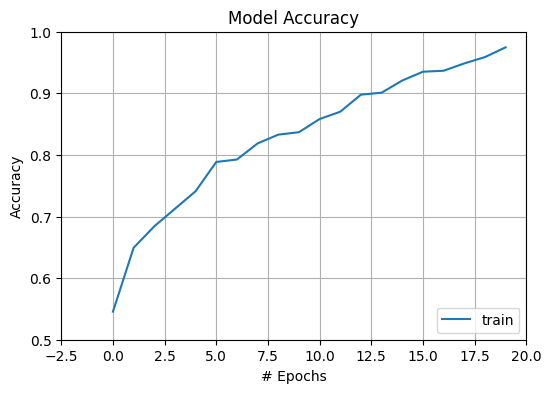

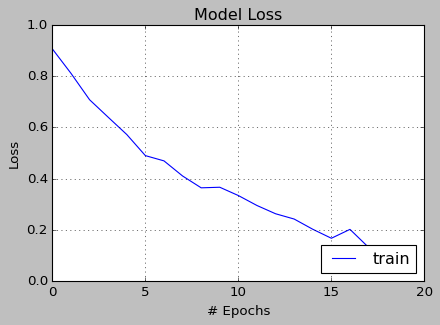

In [7]:
epoch = len(history.history.get('loss',[]))

# Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),history.history.get('accuracy'))
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])

# Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),history.history.get('loss'))
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'], loc=4)
plt.style.use(['classic'])


### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
class_labels = ['benign', 'normal', 'malignant']
mat = confusion_matrix(y_valid, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');


NameError: name 'y_valid' is not defined

There are 240 instances of the benign class correctly predicted as benign, the highest of all the classes.
